In [ ]:
!pip install opencv-python-headless numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

# Define the main directory
main_dir = '../content/drive/MyDrive/mammography'

# Define subdirectories for benign and malignant
benign_dir = os.path.join(main_dir, 'Benign Masses')
malignant_dir = os.path.join(main_dir, 'Malignant Masses')

# Define subcategories
benign_subcategories = ['Fibroadenomas', 'Fibrocystic', 'Cysts']
malignant_subcategories = ['dcis', 'ilc']

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    print(f"Loading images from: {folder}")  # Print the folder path
    if not os.path.exists(folder):
        print(f"Directory does not exist: {folder}")
        return images  # Return an empty list if directory does not exist
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Initialize dictionaries to hold images
benign_images = {}
malignant_images = {}

# Load benign images
for subcategory in benign_subcategories:
    folder_path = os.path.join(benign_dir, subcategory)
    benign_images[subcategory] = load_images_from_folder(folder_path)

# Load malignant images
for subcategory in malignant_subcategories:
    folder_path = os.path.join(malignant_dir, subcategory)
    malignant_images[subcategory] = load_images_from_folder(folder_path)

# Check benign images
for subcategory, images in benign_images.items():
    print(f"Benign {subcategory}: {len(images)} images loaded.")

# Check malignant images
for subcategory, images in malignant_images.items():
    print(f"Malignant {subcategory}: {len(images)} images loaded.")

Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Fibroadenomas
Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Fibrocystic
Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Cysts
Loading images from: ../content/drive/MyDrive/mammography/Malignant Masses/dcis
Loading images from: ../content/drive/MyDrive/mammography/Malignant Masses/ilc
Benign Fibroadenomas: 615 images loaded.
Benign Fibrocystic: 834 images loaded.
Benign Cysts: 593 images loaded.
Malignant dcis: 626 images loaded.
Malignant ilc: 902 images loaded.


Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Fibroadenomas
Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Fibrocystic
Loading images from: ../content/drive/MyDrive/mammography/Benign Masses/Cysts
Loading images from: ../content/drive/MyDrive/mammography/Malignant Masses/dcis
Loading images from: ../content/drive/MyDrive/mammography/Malignant Masses/ilc
Benign Fibroadenomas: 615 images loaded.
Benign Fibrocystic: 834 images loaded.
Benign Cysts: 593 images loaded.
Malignant dcis: 626 images loaded.
Malignant ilc: 902 images loaded.
Processing Fibroadenomas images...


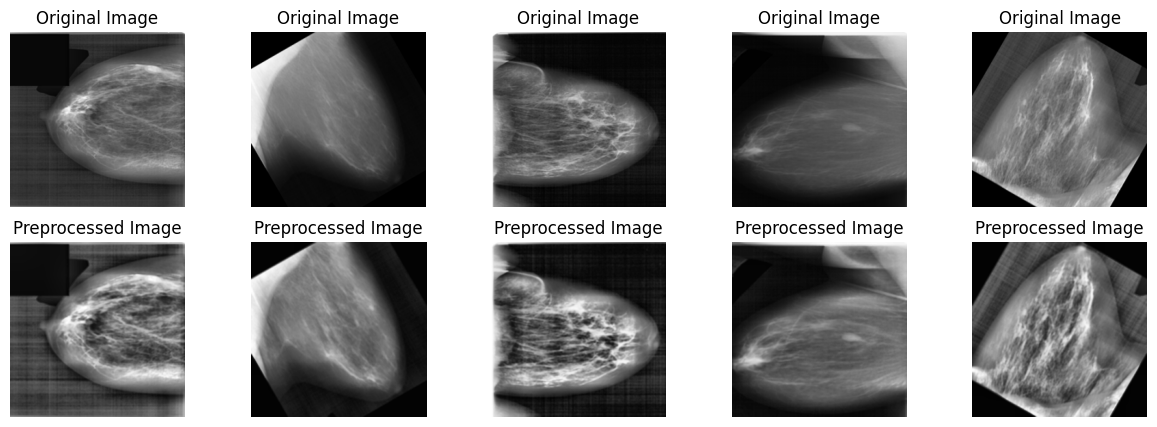

Processing Fibrocystic images...


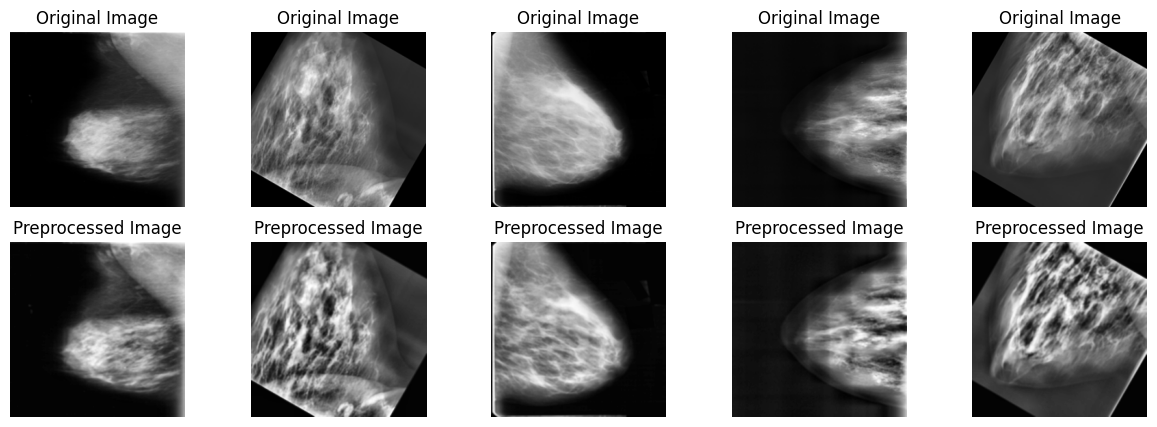

Processing Cysts images...


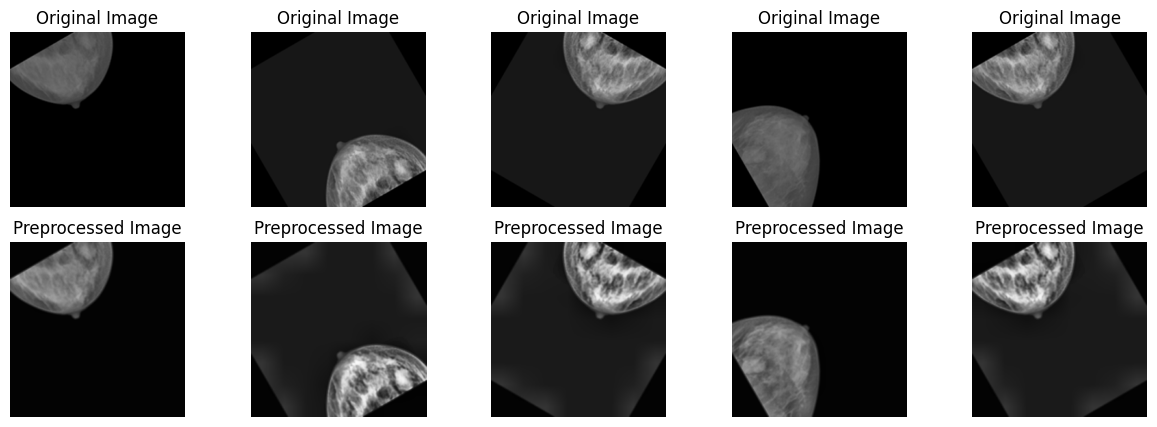

Processing dcis images...


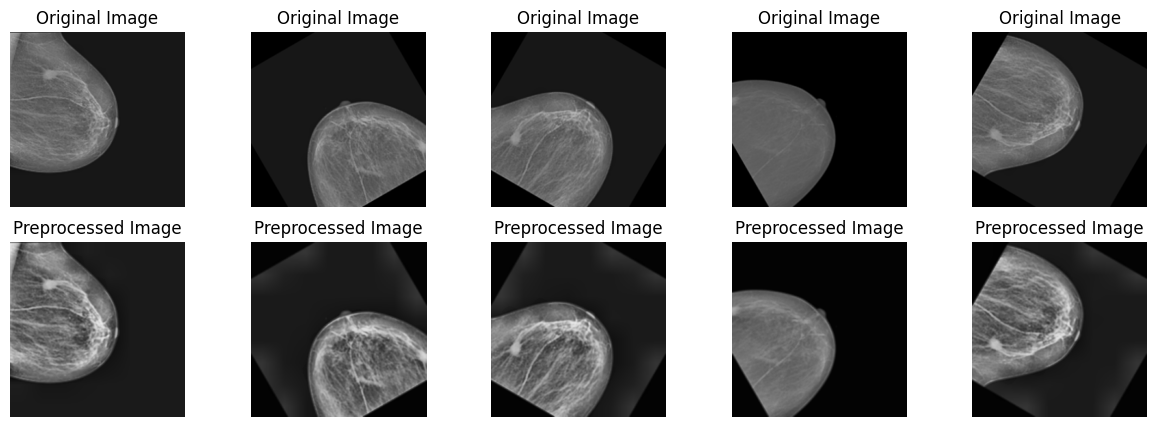

Processing ilc images...


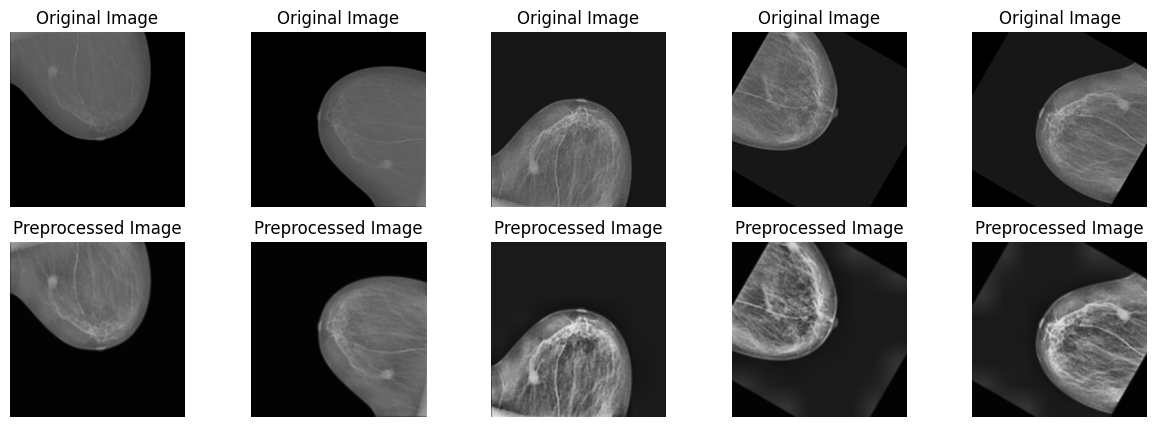

Dataset shape: (3570, 256, 256, 3)
Label shape: (3570,)


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Define the main directory
main_dir = '../content/drive/MyDrive/mammography'

# Define subdirectories for benign and malignant
benign_dir = os.path.join(main_dir, 'Benign Masses')
malignant_dir = os.path.join(main_dir, 'Malignant Masses')

# Define subcategories
benign_subcategories = ['Fibroadenomas', 'Fibrocystic', 'Cysts']
malignant_subcategories = ['dcis', 'ilc']

# Define image size
SIZE = 256

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    print(f"Loading images from: {folder}")  # Print the folder path
    if not os.path.exists(folder):
        print(f"Directory does not exist: {folder}")
        return images  # Return an empty list if directory does not exist
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith('.png') and '_mask' not in img_path:
            img = cv2.imread(img_path)
            if img is not None:
                img = Image.fromarray(img, 'RGB')
                img = img.resize((SIZE, SIZE))
                img = np.array(img)
                images.append(img)
    return images

# Initialize dictionaries to hold images
benign_images = {}
malignant_images = {}

# Load benign images
for subcategory in benign_subcategories:
    folder_path = os.path.join(benign_dir, subcategory)
    benign_images[subcategory] = load_images_from_folder(folder_path)

# Load malignant images
for subcategory in malignant_subcategories:
    folder_path = os.path.join(malignant_dir, subcategory)
    malignant_images[subcategory] = load_images_from_folder(folder_path)

# Check benign images
for subcategory, images in benign_images.items():
    print(f"Benign {subcategory}: {len(images)} images loaded.")

# Check malignant images
for subcategory, images in malignant_images.items():
    print(f"Malignant {subcategory}: {len(images)} images loaded.")

# Custom preprocessing functions
def custom_preprocessing(image):
    # Apply noise to the image
    noisy_image = add_noise_to_image(image)

    # Apply blur to the image
    blurred_image = apply_blur_to_image(noisy_image)

    # Adjust contrast using CLAHE
    enhanced_image = apply_clahe(blurred_image)

    return enhanced_image

def add_noise_to_image(image, noise_scale=0.005):  # Reduced noise scale
    noisy_image = np.clip(image + np.random.normal(loc=0, scale=noise_scale, size=image.shape), 0, 255).astype(np.float32)
    return noisy_image

def apply_blur_to_image(image, kernel_size=(3, 3)):  # Smaller kernel size
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Assume the input image is grayscale
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Ensure the image is 8-bit
    if gray_image.dtype != np.uint8:
        gray_image = cv2.convertScaleAbs(gray_image)

    # Apply CLAHE
    clahe_img = clahe.apply(gray_image)

    # If the original image was color, convert back to color
    if len(image.shape) == 3 and image.shape[2] == 3:
        clahe_img = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2BGR)

    return clahe_img

def display_sample_images(original_images, preprocessed_images, num_samples=5):
    if len(original_images) < num_samples or len(preprocessed_images) < num_samples:
        print("Not enough images to display")
        return

    fig, axs = plt.subplots(2, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        # Display original image
        axs[0, i].imshow(original_images[i])
        axs[0, i].set_title('Original Image')
        axs[0, i].axis('off')

        # Display preprocessed image
        axs[1, i].imshow(preprocessed_images[i])
        axs[1, i].set_title('Preprocessed Image')
        axs[1, i].axis('off')

    plt.show()

# Select and preprocess sample images from each subcategory
def preprocess_and_display_sample_images(images_dict, category_name, num_samples=5):
    for subcategory, images in images_dict.items():
        print(f"Processing {subcategory} images...")
        sample_images = images[:num_samples]
        preprocessed_samples = [custom_preprocessing(img) for img in sample_images]
        display_sample_images(sample_images, preprocessed_samples, num_samples)

# Preprocess and display sample images for benign subcategories
preprocess_and_display_sample_images(benign_images, 'Benign')

# Preprocess and display sample images for malignant subcategories
preprocess_and_display_sample_images(malignant_images, 'Malignant')

# Convert the dataset and labels to numpy arrays for further processing
benign_dataset = [img for sublist in benign_images.values() for img in sublist]
malignant_dataset = [img for sublist in malignant_images.values() for img in sublist]

benign_labels = [0] * len(benign_dataset)  # Label 0 for benign
malignant_labels = [1] * len(malignant_dataset)  # Label 1 for malignant

# Combine the datasets and labels
dataset = np.array(benign_dataset + malignant_dataset)
label = np.array(benign_labels + malignant_labels)

print("Dataset shape:", dataset.shape)
print("Label shape:", label.shape)


In [ ]:
!pip install numpy opencv-python Pillow matplotlib scikit-learn tensorflow


In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

# Combine datasets and labels
benign_dataset = [img for sublist in benign_images.values() for img in sublist]
malignant_dataset = [img for sublist in malignant_images.values() for img in sublist]

benign_labels = [0] * len(benign_dataset)  # Label 0 for benign
malignant_labels = [1] * len(malignant_dataset)  # Label 1 for malignant

# Combine the datasets and labels
dataset = np.array(benign_dataset + malignant_dataset)
label = np.array(benign_labels + malignant_labels)

print("Dataset shape:", dataset.shape)
print("Label shape:", label.shape)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.25, random_state=42)

def calculate_augmentation_multiplier(current_count, target_count):
    if current_count >= target_count:
        return 1
    else:
        return int(np.ceil(target_count / current_count))

target_count = 1514
unique_classes = np.unique(y_train)
class_multipliers = {cls: calculate_augmentation_multiplier(np.sum(y_train == cls), target_count) for cls in unique_classes}

augmentation_configs = {
    cls: ImageDataGenerator(
        rotation_range=10 * cls,
        width_shift_range=0.1 * cls,
        height_shift_range=0.1 * cls,
        zoom_range=0.1 * cls,
        horizontal_flip=True,
        vertical_flip=(cls % 2 == 0),
        preprocessing_function=custom_preprocessing,
        fill_mode='nearest'
    ) for cls in unique_classes
}

def apply_augmentation(image, label):
    class_multiplier = class_multipliers[label]
    augmented_images = []
    for _ in range(class_multiplier):
        augmented_image = augmentation_configs[label].random_transform(image)
        augmented_images.append(augmented_image)
    return np.array(augmented_images), np.array([label] * class_multiplier)

augmented_X_train = []
augmented_y_train = []
for img, lbl in zip(X_train, y_train):
    aug_imgs, aug_lbls = apply_augmentation(img, lbl)
    augmented_X_train.extend(aug_imgs)
    augmented_y_train.extend(aug_lbls)

augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)

unique_classes, counts = np.unique(augmented_y_train, return_counts=True)
class_counts = dict(zip(unique_classes, counts))

print("Augmented Counts:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} images")

print("Shape of augmented training images:", augmented_X_train.shape)
print("Shape of augmented training labels:", augmented_y_train.shape)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weight)

# One-hot encode the labels
augmented_y_train = to_categorical(augmented_y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Load the ResNet50 base model
input_tensor = Input(shape=(256, 256, 3))
base_model = tf.keras.applications.ResNet50(include_top=False,
                                         weights='imagenet',
                                         input_tensor=input_tensor,
                                         pooling='max')

# Set the layers as trainable or non-trainable
for layer in base_model.layers[:-12]:
    layer.trainable = False
for layer in base_model.layers[-12:]:
    layer.trainable = True

# Add custom layers
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint_path = 'weights/ResNet50_model_weights.h5'
checkpoint_best_acc = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

checkpoint_best_loss = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              min_lr=1e-7,
                              verbose=1)

# Train the model
history = model.fit(
    augmented_X_train, augmented_y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[checkpoint_best_acc, checkpoint_best_loss, early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test_labels, y_pred))

Dataset shape: (3570, 256, 256, 3)
Label shape: (3570,)
Augmented Counts:
Class 0: 1522 images
Class 1: 2310 images
Shape of augmented training images: (3832, 256, 256, 3)
Shape of augmented training labels: (3832,)
Class weights: {0: 0.8794349540078844, 1: 1.1588744588744588}
94765736/94765736 [==============================] - 2s 0us/step
Epoch 1/10
120/120 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.9235
Epoch 1: val_accuracy improved from -inf to 0.91265, saving model to weights/ResNet50_model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss improved from inf to 0.42404, saving model to weights/ResNet50_model_weights.h5
120/120 [==============================] - 1443s 12s/step - loss: 0.2307 - accuracy: 0.9235 - val_loss: 0.4240 - val_accuracy: 0.9127 - lr: 5.0000e-04
Epoch 2/10
120/120 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9807
Epoch 2: val_accuracy improved from 0.91265 to 0.99440, saving model to weights/ResNet50_model_weights.h5

Epoch 2: val_loss improved from 0.42404 to 0.02696, saving model to weights/ResNet50_model_weights.h5
120/120 [==============================] - 1422s 12s/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0270 - val_accuracy: 0.9944 - lr: 5.0000e-04
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9940
Epoch 3: val_accuracy improved from 0.99440 to 0.99888, saving model to weights/ResNet50_model_weights.h5

Epoch 3: val_loss improved from 0.02696 to 0.00493, saving model to weights/ResNet50_model_

112/112 [==============================] - 985s 9s/step


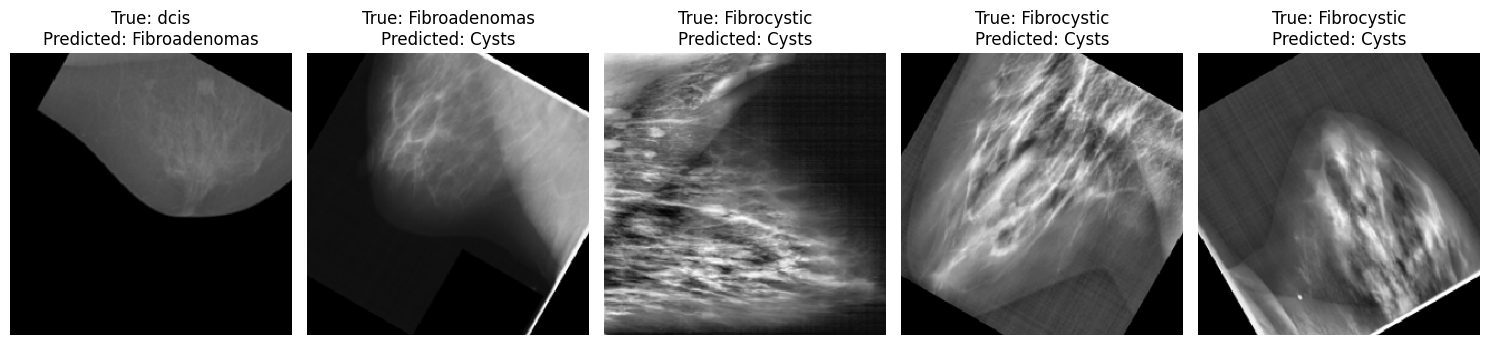

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define the main directory
main_dir = '../content/drive/MyDrive/mammography'

# Define subdirectories for benign and malignant
benign_dir = os.path.join(main_dir, 'Benign Masses')
malignant_dir = os.path.join(main_dir, 'Malignant Masses')

# Define subcategories
benign_subcategories = ['Fibroadenomas', 'Fibrocystic', 'Cysts']
malignant_subcategories = ['dcis', 'ilc']

# Function to load images from a directory
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):  # Ensure that only image files are processed
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(256, 256))  # Resize image to 256x256
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return images, labels

# Initialize lists to store images and labels
images = []
labels = []

# Load benign images
for subcategory in benign_subcategories:
    directory = os.path.join(benign_dir, subcategory)
    imgs, lbls = load_images_from_directory(directory, subcategory)
    images.extend(imgs)
    labels.extend(lbls)

# Load malignant images
for subcategory in malignant_subcategories:
    directory = os.path.join(malignant_dir, subcategory)
    imgs, lbls = load_images_from_directory(directory, subcategory)
    images.extend(imgs)
    labels.extend(lbls)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Load the trained model
model = load_model('weights/ResNet50_model_weights.h5')

# Predict the labels
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert predicted labels back to original labels
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)
true_labels_original = label_encoder.inverse_transform(np.argmax(labels_categorical, axis=1))

# Function to display images along with true and predicted labels
def display_images(images, true_labels, predicted_labels, num_samples_to_display=5):
    num_samples = len(images)
    random_indices = np.random.choice(num_samples, num_samples_to_display, replace=False)
    images_to_display = images[random_indices]
    true_labels_to_display = true_labels[random_indices]
    predicted_labels_to_display = predicted_labels[random_indices]

    plt.figure(figsize=(15, 5))
    for i in range(num_samples_to_display):
        plt.subplot(1, num_samples_to_display, i + 1)
        plt.imshow(images_to_display[i].astype('uint8'))
        plt.title(f"True: {true_labels_to_display[i]}\nPredicted: {predicted_labels_to_display[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some true and predicted images for the five classes
display_images(images, true_labels_original, predicted_labels_original)


In [ ]:
!pip install google-cloud-vision


In [ ]:
!pip install llama_index-multi_modal_llms-gemini

In [1]:
!pip install openai==0.28


Error loading model: Unable to open file (truncated file: eof = 56623104, sblock->base_addr = 0, stored_eof = 143283856)
Exiting due to model load failure.
Error loading or processing image: 'NoneType' object has no attribute 'predict'


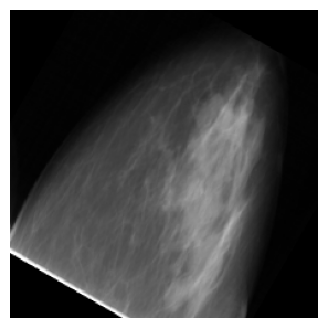

Predicted Label: Model not loaded, prediction unavailable.
Description: I'm unable to view images. However, if you describe the image to me, I can provide information or help based on the description you provide.


In [3]:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import openai

# Set your OpenAI API key
OPENAI_API_KEY = ""
openai.api_key = OPENAI_API_KEY

# Path to your model
model_path = '/content/ResNet50_model_weights.h5'

# Function to load the model with error handling
def load_model_with_error_handling(model_path):
    try:
        model = load_model(model_path)
        print("Model loaded successfully.")
        return model
    except OSError as e:
        print(f"Error loading model: {e}")
        return None

# Load the trained model
model = load_model_with_error_handling(model_path)
if model is None:
    # Exit if the model cannot be loaded
    print("Exiting due to model load failure.")
    exit()

# Load image documents
image_path = "/content/M2 (347).png"
image_directory = os.path.dirname(image_path)

# Since we only have one image, we use it directly
image_urls = [image_path]

# Encode the labels (you need to make sure you have the same label encoder used during training)
label_encoder = LabelEncoder()
label_encoder.fit(['Fibroadenomas', 'Fibrocystic', 'Cysts', 'dcis', 'ilc'])  # Fit with all possible labels

# Predict the label of the image using the pre-trained model
try:
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_label = label_encoder.inverse_transform(np.argmax(prediction, axis=1))[0]
except Exception as e:
    print(f"Error loading or processing image: {e}")
    exit()

# Function to describe an image using OpenAI GPT-3.5
def describe_image_openai(image_path):
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()

    # Prepare the prompt for the GPT-3.5 model
    prompt = f"Describe the following image in detail: {image_path}"

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=500
    )

    return response['choices'][0]['message']['content'].strip()

# Describe the image using OpenAI GPT-3.5
description = describe_image_openai(image_path)

# Display the image along with the predicted label and description
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

print("Predicted Label:", predicted_label)
print("Description:", description)